# Homework

### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 0  # initialization

In [33]:
xbar = x.mean()                              # sample mean of the data
for c in range(C):
    for g in range(1, G):
        # update tau first, using previous theta
        sum_squares = np.sum((x - theta[c,g-1])**2)
        alpha = n/2 + 1
        # shape,scale parameterization => scale = sum_squares/2
        tau[c,g] = stats.gamma.rvs(a=alpha, scale=sum_squares * 0.5)

        # update theta next, using newly sampled tau
        theta[c,g] = stats.norm.rvs(loc=xbar, scale=np.sqrt(1.0/(n * tau[c,g])))

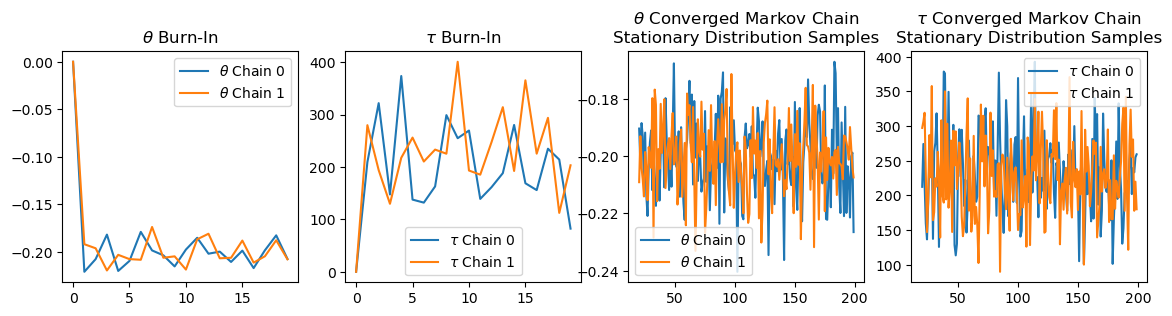

In [34]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 200
for c in range(C):
    ax[0].plot(np.arange(0, burn, dtype=int), theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(np.arange(0, burn, dtype=int), tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();

### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*


### 1. Full Conditional Distributions

Given:
- A **Normal prior** on \\(\theta\\):
  \\[
    \theta \sim \mathcal{N}\bigl(\theta_0,\;\tau_0^2\bigr),
  \\]
- A **Gamma prior** on \\(\tau\\) (the precision):
  \\[
    p(\tau)\; \propto \;\tau^{\frac{\alpha}{2}\,-1}\;\exp\!\Bigl(-\tfrac{\lambda}{2}\,\tau \Bigr),
  \\]
- A **likelihood** for data \\(\mathbf x = (x_1,\ldots,x_n)\\) under 
  \\(\theta,\tau\\):
  \\[
    x_i \mid \theta,\tau \;\sim\; \mathcal{N}\!\bigl(\theta,\;1/\tau\bigr),
  \\]

the joint posterior for \\(\theta,\tau\\) is proportional to
\\[
  L(\theta,\tau \mid x)\,\times\,p(\theta)\,\times\,p(\tau).
\\]

**(a) \\(p(\tau \mid \theta,x)\\).**  
Combine the likelihood in \\(\tau\\) (which is \\(\tau^{n/2}\exp\bigl(-\frac{\tau}{2}\sum_{i=1}^n (x_i-\theta)^2\bigr)\\)) with the Gamma prior 
\\(\tau^{\frac{\alpha}{2}-1}\exp(-\frac{\lambda}{2}\tau)\\).  
Thus,
\\[
  p(\tau\mid\theta,x) 
  \;\propto\;
  \tau^{\tfrac{n}{2}}\,e^{-\tfrac{\tau}{2}\sum_i (x_i-\theta)^2}
  \;\times\;\tau^{\tfrac{\alpha}{2}-1}\,e^{-\tfrac{\lambda}{2}\,\tau}
  \;=\;
  \tau^{\tfrac{n + \alpha}{2}-1}\;
  \exp\!\Bigl(\;-\tfrac{1}{2}\,\tau\bigl[\sum (x_i-\theta)^2 + \lambda\bigr]\Bigr).
\\]
This is recognized as a Gamma distribution with shape \\(\tfrac{n + \alpha}{2}\\) and rate \\(\tfrac{1}{2}\bigl[\sum (x_i-\theta)^2 + \lambda\bigr]\\).  

Hence in the \\((\text{shape},\text{rate})\\) convention:
\\[
  \tau\mid \theta,x \;\sim\;
  \mathrm{Gamma}\!\Bigl(\,
    \frac{n+\alpha}{2}, \;\frac{\sum_{i=1}^n (x_i-\theta)^2 + \lambda}{2}
  \Bigr).
\\]

---

**(b) \\(p(\theta \mid \tau,x)\\).**  
Combine the Gaussian likelihood in \\(\theta\\) (mean \\(\bar x\\), precision \\(\tau n\\)) with the Gaussian prior \\(\mathcal{N}(\theta_0,\,\tau_0^2)\\).  The posterior is again Gaussian:
\\[
  \theta\mid(\tau, x)\;\sim\;\mathcal{N}\!\Bigl(\,\mu_{\theta},\;\sigma_{\theta}^2\Bigr),
\\]
where
\\[
  \sigma_{\theta}^2 
  \;=\;\bigl(\tau\,n \;+\;\tfrac{1}{\tau_0^2}\bigr)^{-1}, 
  \quad
  \mu_{\theta} 
  \;=\;\sigma_{\theta}^2 \Bigl(\tau\,n\,\bar{x}\;+\;\tfrac{\theta_0}{\tau_0^2}\Bigr).
\\]

### 2. Interpreting \\(\alpha\\) and \\(\lambda\\) in Terms of “Prior Data Points”

- \\(\alpha\\) controls how strongly the prior Gamma distribution on \\(\tau\\) is concentrated.  A larger \\(\alpha\\) acts like having more “prior observations” of the variance/precision.
- \\(\lambda\\) sets the scale for that precision; larger \\(\lambda\\) biases \\(\tau\\) to be smaller (i.e., the prior expects a larger variance).

Heuristically, one can think of \\(\frac{\alpha}{2}\\) as “the number of pseudo-data points” and \\(\frac{\lambda}{2}\\) as “the sum of squares from those pseudo-points,” though the exact interpretation depends on the chosen parametrization.

### 3&4. Updated Gibbs Sampler

Below is sample Python code to implement the Gibbs sampler under the new priors 
(\\(\theta\sim \mathcal{N}(\theta_0,\,\tau_0^2)\\) and 
\\(\tau\sim \mathrm{Gamma}(\alpha/2,\,\lambda/2)\\)).

Prior mean of theta = 1.741522888407482
Prior mean of tau   = 1.1451484986214662
Posterior mean of theta = 1.7595037389150958
Posterior mean of tau   = 1.2167760237504033


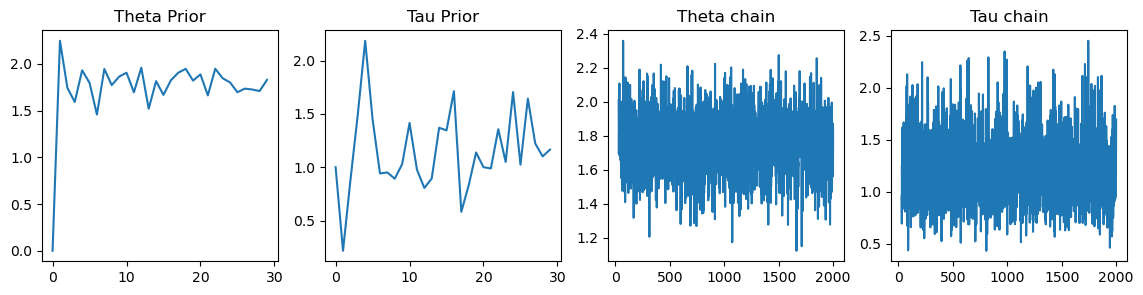

In [28]:
from scipy.stats import norm, gamma
np.random.seed(42)

n = 30
theta_true = 2.0
tau_true   = 1.0  # i.e. variance = 1/1 = 1
x = np.random.normal(loc=theta_true, 
                     scale=np.sqrt(1/tau_true), 
                     size=n)

#    theta ~ N(theta0, tau0^2)
#    tau   ~ Gamma(alpha/2, rate=lambda/2)
theta0  = 0.0
tau0_sq = 1.0   # Var of the normal prior on theta
alpha   = 2.0
lam     = 2.0

G = 10000               # total number of samples
burn_in = 30          # discard first 30 as burn-in
theta_samples = np.zeros(G)
tau_samples   = np.zeros(G)

# Initialize
theta_samples[0] = 0.0
tau_samples[0]   = 1.0

for g in range(1, G):
    # -- (a) Sample tau | theta, x --
    shape = 0.5*(n + alpha)
    rate  = 0.5*(np.sum((x - theta_samples[g-1])**2) + lam)
    # 'gamma.rvs(a=shape, scale=1/rate)' uses shape-scale parametrization
    tau_samples[g] = gamma.rvs(a=shape, scale=1.0/rate)
    
    # -- (b) Sample theta | tau, x --
    post_var = 1.0 / (tau_samples[g]*n + 1.0/tau0_sq)
    post_mean = post_var * (tau_samples[g]*n * x.mean() + theta0/tau0_sq)
    theta_samples[g] = norm.rvs(loc=post_mean, scale=np.sqrt(post_var))

theta_pre = theta_samples[:burn_in]
tau_pre   = tau_samples[:burn_in]    

theta_post = theta_samples[burn_in:]
tau_post   = tau_samples[burn_in:]

print("Prior mean of theta =", theta_pre.mean())
print("Prior mean of tau   =", tau_pre.mean())
print("Posterior mean of theta =", theta_post.mean())
print("Posterior mean of tau   =", tau_post.mean())

# Plot the chains (just a quick visualization)
fig, axs = plt.subplots(1, 4, figsize=(14,3))
demo_2 = 2000
axs[0].plot(np.arange(0, burn_in, dtype=int), theta_samples[:burn_in])
axs[0].set_title("Theta Prior")
axs[1].plot(np.arange(0, burn_in, dtype=int), tau_samples[:burn_in])
axs[1].set_title("Tau Prior")
axs[2].plot(np.arange(burn_in, demo_2, dtype=int), theta_samples[burn_in:demo_2])
axs[2].set_title("Theta chain")
axs[3].plot(np.arange(burn_in, demo_2, dtype=int), tau_samples[burn_in:demo_2])
axs[3].set_title("Tau chain")
plt.show()

### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality (if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far for you) is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



## (A) Analogous Derivation for the Multinomial–Dirichlet Model

### 1. Model Setup

We have data \\(\mathbf{x} = (x_1,\dots,x_N)\\), each \\(x_i \in \{1,\ldots,K\}\\). 
Summarize them by the counts \\(n_j\\) for category \\(j\\):
\\[
  n_j \;=\; \sum_{i=1}^N \mathbf{1}\{ x_i = j\}, \quad
  \sum_{j=1}^K n_j = N.
\\]

#### Likelihood

We assume:
\\[
  p(\mathbf{x} \mid \boldsymbol{\theta}) 
  \;=\; 
  \prod_{j=1}^K \theta_j^{n_j},
  \quad \text{with } \sum_{j=1}^K \theta_j = 1, \; \theta_j \ge 0.
\\]
Equivalently, in multinomial form:
\\[
  p(\mathbf{x} \mid \boldsymbol{\theta})
  \;=\;
  \frac{N!}{\,n_1!\,\cdots\,n_K!\,}\,
  \prod_{j=1}^K \theta_j^{n_j}.
\\]

#### Prior

Let
\\[
  \boldsymbol{\theta} 
  \;\sim\; 
  \mathrm{Dirichlet}(\alpha_1,\ldots,\alpha_K).
\\]
Its density is:
\\[
  p(\boldsymbol{\theta})
  \;=\;
  \frac{1}{\mathrm{B}(\boldsymbol{\alpha})}
  \,\prod_{j=1}^K \theta_j^{\,\alpha_j - 1},
  \quad
  \mathrm{B}(\boldsymbol{\alpha})
  \;=\; 
  \frac{\prod_{j=1}^K \Gamma(\alpha_j)}{\Gamma\!\Bigl(\sum_{j=1}^K \alpha_j\Bigr)}.
\\]

### 2. Joint Distribution and Posterior

The **joint** of data and parameters is:
\\[
  p(\mathbf{x}, \boldsymbol{\theta})
  \;=\; p(\mathbf{x} \mid \boldsymbol{\theta}) \, p(\boldsymbol{\theta}).
\\]
As a function of \\(\boldsymbol{\theta}\\),
\\[
  p(\mathbf{x}, \boldsymbol{\theta})
  \;\propto\;
  \left(\prod_{j=1}^K \theta_j^{n_j}\right)
  \left(\prod_{j=1}^K \theta_j^{\alpha_j - 1}\right)
  \;=\;
  \prod_{j=1}^K \theta_j^{\,n_j + \alpha_j - 1}.
\\]

By Bayes’s theorem:
\\[
  p(\boldsymbol{\theta} \mid \mathbf{x})
  \;=\; \frac{p(\mathbf{x}, \boldsymbol{\theta})}{p(\mathbf{x})}
  \;\propto\;
  p(\mathbf{x}, \boldsymbol{\theta})
  \;\propto\;
  \prod_{j=1}^K \theta_j^{n_j + \alpha_j - 1}.
\\]
We recognize this as the kernel of a Dirichlet distribution.

### 3. Identifying the Posterior Family

Since
\\[
  p(\boldsymbol{\theta} \mid \mathbf{x})
  \;\propto\;
  \prod_{j=1}^K \theta_j^{\,(n_j + \alpha_j) - 1},
\\]
we conclude
\\[
  \boldsymbol{\theta} \,\big|\;\mathbf{x}
  \;\sim\;
  \mathrm{Dirichlet}\Bigl(\alpha_1 + n_1,\;
                           \alpha_2 + n_2,\;
                           \ldots,\;
                           \alpha_K + n_K\Bigr).
\\]

Hence the **posterior** parameters are simply \\(\alpha_j + n_j\\) for each \\(j=1,\dots,K\\).

### 4. Integration Check

If one insists, the marginal likelihood \\(p(\mathbf{x})\\) can be computed by noticing that
\\[
  \int p(\mathbf{x}, \boldsymbol{\theta}) \, d\boldsymbol{\theta}
\\]
is the product of the multinomial and Dirichlet normalizing constants, which can be recognized as the normalizing constant for a Dirichlet distribution with parameters \\(\alpha_j + n_j\\). But in practice, we rarely do this integral explicitly if we trust Bayes’s theorem and recognize the functional form.

### Final Posterior

\\[
  \boxed{
    \boldsymbol{\theta} \mid \mathbf{x}
    \;\sim\;
    \mathrm{Dirichlet}(\alpha_1 + n_1,\;\dots,\;\alpha_K + n_K).
  }
\\]
